## Support Vector Regression

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
## Creating synthetic data points
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3)

In [85]:
x

array([[-1.02348862, -0.67119573],
       [ 1.36562651, -1.06305851],
       [ 1.267131  ,  1.64084619],
       ...,
       [-2.16977038,  1.06664551],
       [ 0.40237908, -0.04403746],
       [-0.70868243,  0.70256115]])

In [86]:
y

array([-1.14409536e+02,  9.07712407e+01,  1.63839420e+02,  9.64186128e+01,
       -5.95783763e+01, -8.08388435e+01, -8.02604066e+01,  2.34633833e+02,
        5.37924372e+00,  9.27203273e+01, -7.94547143e+01, -2.51880709e+01,
        8.38029376e+01,  2.97780216e+01,  2.53431068e+01, -3.36840591e+01,
       -1.51837682e+01, -6.84650413e+00, -1.14235972e+01,  4.55019326e+01,
       -3.61811840e+01,  7.24986905e+01,  6.21652402e+01,  4.78318796e+01,
        3.13806030e+01, -6.64398467e+01, -6.75793950e+01, -2.94227536e+01,
       -1.66923204e+02,  1.21750109e+02, -1.30845387e+02, -2.36475268e+01,
        2.49504967e+01, -5.52695139e+01,  8.65036060e+01,  7.59129816e+01,
       -1.04409760e+02, -4.14655883e+01, -6.45642587e+00, -6.40672422e+01,
        2.50075185e+01,  1.09928025e+02,  9.92710007e+01, -1.03407871e+01,
       -1.11010901e+01,  1.26358631e+02, -7.89958955e+01,  1.97526683e+01,
       -5.91694671e+01, -5.17889273e+01,  7.34726516e+00,  2.79696430e+01,
        9.41706309e-01,  

<AxesSubplot: xlabel='0', ylabel='1'>

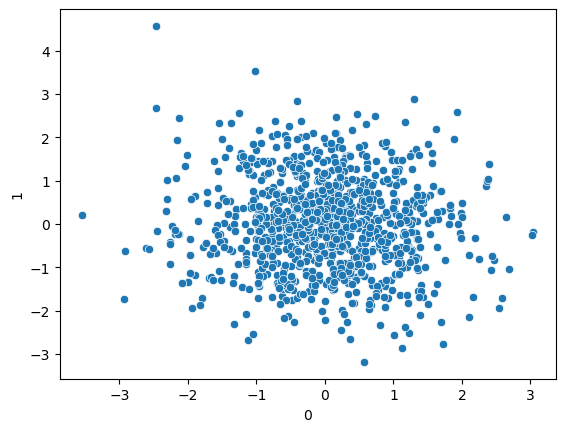

In [87]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1])

In [88]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [89]:
# Model_Training
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [90]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [91]:
y_pred=svr.predict(x_test)

In [92]:
y_pred

array([-4.14311388e+00, -9.86504308e+01, -2.94738422e+01, -6.30873890e+01,
        2.94449659e+01,  1.37729032e+01,  5.82182719e+01, -1.92843063e+02,
        2.66580460e+01,  1.22569530e+02, -8.87542761e+01, -2.89529389e+00,
        5.74454765e+01,  4.16639984e+01, -2.33394840e+02, -1.21128464e+01,
        1.75782854e+02, -6.54166463e+01,  8.03241742e+00,  9.35974735e+01,
        8.18348662e+01,  1.16871970e+02,  1.43235995e+02,  1.34856182e+02,
        3.23187172e+01,  5.20561090e+01, -4.60251901e+00, -1.44552112e+02,
       -9.42645342e+01,  3.13716452e+01, -2.17687351e+01,  6.78599793e+01,
       -1.51381237e+02,  1.83147226e+01,  5.45179333e+01, -8.19619046e+00,
        9.14671797e+00,  3.67129982e+01, -7.03230428e+01, -2.59479589e+01,
        9.47532016e+01,  1.74978776e+02, -4.67061466e+01,  1.54697867e+02,
        7.78768044e+01, -7.05963256e+01,  2.10298400e+01,  9.18485548e+01,
        1.62437235e+01, -1.13465417e+02, -3.54541280e+01, -1.45288324e+02,
        1.15007453e+02, -

In [93]:
# Checking model accuracy
from sklearn.metrics import r2_score
print('The model accuracy is', r2_score(y_test,y_pred)*100, '%')

The model accuracy is 99.88516122427339 %


In [94]:
# Hyperparameter Tuning with Cross Validation
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

grid = GridSearchCV(svr, param_grid=parameters, scoring = 'neg_mean_squared_error', refit=True, cv=5, verbose = 3)

In [95]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-3281.552 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-2459.708 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-2321.423 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1799.283 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-2351.690 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-3281.552 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2459.708 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2321.423 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1799.283 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2351.690 total time=   0.0

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [96]:
# Selecting the best parameters
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [97]:
# Building the model with the above parameters
svr = SVR(C= 10, epsilon= 0.2, gamma= 1, kernel= 'linear')

In [98]:
# Model Training
svr.fit(x_train, y_train)

SVR(C=10, epsilon=0.2, gamma=1, kernel='linear')

In [99]:
y_pred = svr.predict(x_test)

In [100]:
y_pred

array([-4.16285794e+00, -9.91561449e+01, -2.96333009e+01, -6.34161536e+01,
        2.95654846e+01,  1.38010597e+01,  5.84654882e+01, -1.93774679e+02,
        2.67459019e+01,  1.23125693e+02, -8.91908985e+01, -2.94831743e+00,
        5.76977711e+01,  4.18370416e+01, -2.34508138e+02, -1.21795489e+01,
        1.76575263e+02, -6.57425267e+01,  8.04749252e+00,  9.39797567e+01,
        8.21523861e+01,  1.17388708e+02,  1.43883816e+02,  1.35478159e+02,
        3.24432039e+01,  5.22696973e+01, -4.64034112e+00, -1.45256053e+02,
       -9.47442333e+01,  3.15066694e+01, -2.19004107e+01,  6.81350557e+01,
       -1.52108330e+02,  1.83871054e+01,  5.47508644e+01, -8.25868295e+00,
        9.17017198e+00,  3.68609895e+01, -7.06415948e+01, -2.60948373e+01,
        9.51574749e+01,  1.75787735e+02, -4.69483182e+01,  1.55408143e+02,
        7.81827575e+01, -7.09323843e+01,  2.11094072e+01,  9.22481857e+01,
        1.62856340e+01, -1.14008401e+02, -3.56311238e+01, -1.45989963e+02,
        1.15530971e+02, -

In [101]:
# Checking model accuracy
print('The model accuracy is', r2_score(y_test,y_pred)*100, '%')

The model accuracy is 99.88999611633888 %
